
# **Build a Full ML Pipeline**

**Due:** July 15 (Monday)   |   **Total Points:** 100  
**Submission:** Share a link to your completed Google Colab notebook (set sharing to *“University of Colorado Boulder”*)



## 🎯 What You’ll Learn
- Practice exploratory data analysis (EDA)  
- Clean and preprocess real‑world data  
- Build a complete *Scikit‑learn* ML pipeline  
- Train and evaluate classification models  
- Reflect on your design decisions  
- Use AI tools responsibly (if you choose to use them)



## 🧠 You May Use AI, But…
You **may use AI** to:  
* Ask for help writing functions  
* Look up syntax  
* Get suggestions on model types  

You **must NOT**:  
* Submit copy‑pasted code without understanding it  
* Skip explanation and reflection questions  



## 📂 Dataset Choices
Choose **any** dataset that interests you from [Kaggle](https://www.kaggle.com/). Make sure it contains **both numerical and categorical columns** plus a **target variable** you’d like to predict.



---  
### Part 1 – Explore the Data (20 pts)
1. Load the dataset with **Pandas**  
2. Run `.info()`, `.describe()`, and `.value_counts()` and any other commands to explora the dataset
3. Create visualizations to show distributions & correlations  
4. **Markdown →** Explain:  
   * What do the rows represent?  
   * What’s your **target** variable?  
   * What do you think each feature means?


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


=== HEAD ===
   post_id   platform post_type        post_time  likes  comments  shares  \
0        1   Facebook     image  8/17/2023 14:45   2121       474     628   
1        2   Facebook  carousel   5/14/2023 0:45   3660       432     694   
2        3  Instagram      poll  2/21/2023 16:15   4955       408     688   
3        4    Twitter     image  11/16/2023 0:45   1183        90     187   
4        5    Twitter     video   5/23/2023 0:30   3499       247     286   

   post_day sentiment_score  
0  Thursday        positive  
1    Sunday         neutral  
2   Tuesday        negative  
3  Thursday        negative  
4   Tuesday        positive   

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 

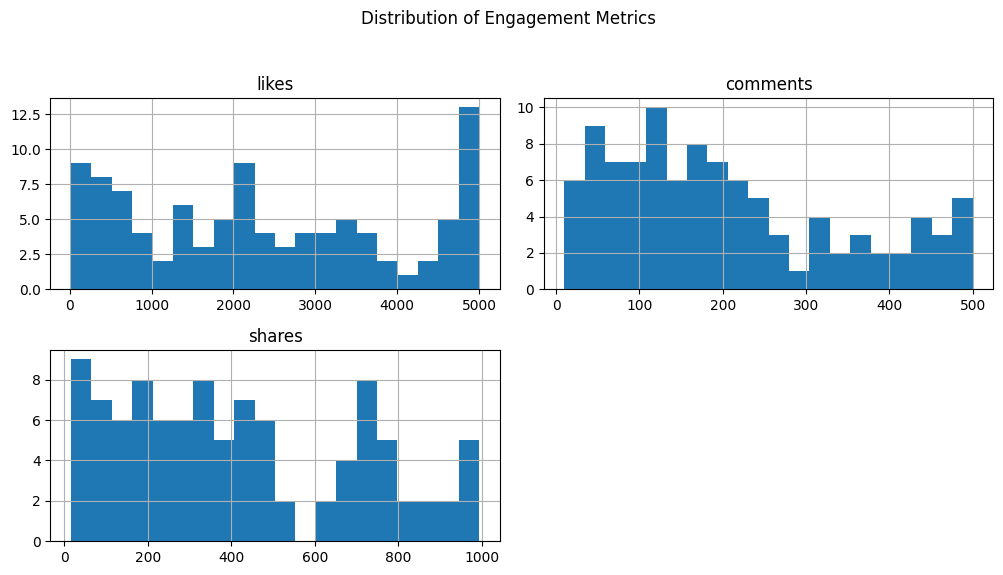

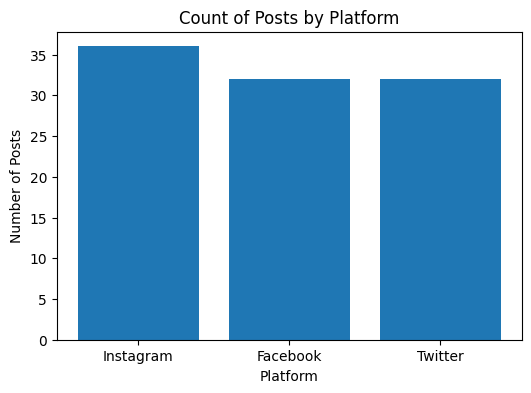

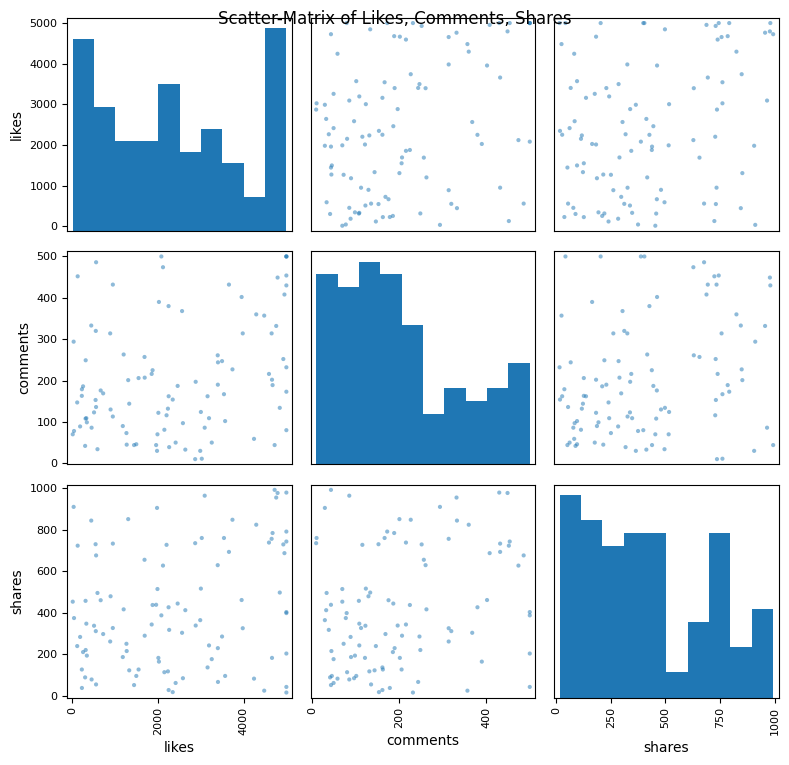

In [2]:
# 📝 Part 1 Code Cell
file_path = '/content/drive/MyDrive/info_4604/datasets/social_media_engagement1.csv'

df = pd.read_csv(file_path)

print("=== HEAD ===")
print(df.head(), "\n")

print("=== INFO ===")
df.info()
print()

print("=== DESCRIBE (all columns) ===")
print(df.describe(include='all'), "\n")

print("=== PLATFORM VALUE COUNTS ===")
print(df['platform'].value_counts(), "\n")

print("=== UNIQUE POST TYPES ===")
print(df['post_type'].value_counts(), "\n")

print("=== SENTIMENT SCORE COUNTS ===")
print(df['sentiment_score'].value_counts(), "\n")

df[['likes','comments','shares']].hist(bins=20, figsize=(10,6))
plt.suptitle('Distribution of Engagement Metrics')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(6,4))
counts = df['platform'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Count of Posts by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.show()

scatter_matrix(df[['likes','comments','shares']], figsize=(8,8))
plt.suptitle('Scatter-Matrix of Likes, Comments, Shares', y=0.95)
plt.tight_layout()
plt.show()

#### ✏️ Your Explanation (Part 1)  

Each row represents a single social media post, identified by post_id. The other columns represent attributes of that post (platform, time, engagement, etc.)

To create a regression model of engagement, I am using likes as my target variable

Features:
- post_id : Unique identifier
- platform : Social Media Platform
- post_type : Format of Post
- post_time : Timestamp of when post went live
- likes : Number of "likes" (target variable)
- comments : Number of comments
- shares : Number of times post was shared
- post_day : day of the week
- sentiment_score : categorical: positive/neutral/negative




---  
### Part 2 – Handle Missing Data (Extra credit 10 pts)
1. Identify columns with missing values  
2. Decide on an imputation strategy (**drop / 0 / mean / median / mode / 'Unknown'**)  
3. Apply using **Pandas** *or* `SimpleImputer`  
4. **Markdown →** Explain **why** you chose each strategy.


In [3]:
# 📝 Part 2 Code Cell
import pandas as pd
from sklearn.impute import SimpleImputer

print("Missing values before imputation:")
print(df.isnull().sum(),"\n")

Missing values before imputation:
post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64 



#### ✏️ Explanation of Imputation Choices  

Because every column reports 0 missing values, there is nothing to impute or drop. The dataset is complete.

**bold text**
---  
### Part 3 – Prepare Features (20 pts)
1. Identify which features are **numeric** vs **categorical**  
2. Decide whether to **scale** (`StandardScaler`, etc.) or **encode** (`OneHotEncoder`) each one  
3. Build a `ColumnTransformer` applying the chosen preprocessing  
4. **Markdown →** Why scale? Why encode? Which features did you leave unchanged?


In [4]:
# 📝 Part 3 Code Cell
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Define feature lists
numeric_features     = ['likes', 'comments', 'shares']
categorical_features = ['platform', 'post_type', 'post_day']

# 2. Build transformer (make OneHot dense directly)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ],
    remainder='drop'
)

# 3. Fit & transform
preprocessor.fit(df)
X_transformed = preprocessor.transform(df)   # now this is a (100 × 21) numpy array

# 4. Grab the correct output names
feature_names = preprocessor.get_feature_names_out()

df_transformed = pd.DataFrame(
    X_transformed,
    columns=feature_names,
    index=df.index
)

print("Original shape:", df.shape)
print("Transformed shape:", df_transformed.shape)
print(df_transformed.columns.tolist())  # confirms you have 21 column names


Original shape: (100, 9)
Transformed shape: (100, 18)
['num__likes', 'num__comments', 'num__shares', 'cat__platform_Facebook', 'cat__platform_Instagram', 'cat__platform_Twitter', 'cat__post_type_carousel', 'cat__post_type_image', 'cat__post_type_poll', 'cat__post_type_text', 'cat__post_type_video', 'cat__post_day_Friday', 'cat__post_day_Monday', 'cat__post_day_Saturday', 'cat__post_day_Sunday', 'cat__post_day_Thursday', 'cat__post_day_Tuesday', 'cat__post_day_Wednesday']


#### ✏️ Feature‑Prep Rationale  
Explain why you chose to scale / encode / leave alone each feature…

I scaled the numeric_features = ['likes', 'comments', 'shares'] because the three engagement counts have different ranges and distributions. So we are creating a zero-mean space to prevent any one metric from dominating the model because of its scale.

I encoded categorical_features = ['platform', 'post_type', 'post_day', 'sentiment_score'] because these were string objects and Machine Learning can't work with strings so we converted them over to binary/dummy variable so the model can differentiate like "Facebook" from "Instagram"

I dropped post_id and post_time. post_id was only an identifier and didn't add anything to the prediction, and post_time would be better handled via explicit datetime features if needed

Everything else was either scaled or encoded


---  
### Part 4 – Build a Pipeline & Train a Model (20 pts)
1. Wrap **preprocessing** + **model** in a `Pipeline`  
2. Split data using `train_test_split`  
3. Fit the pipeline and evaluate accuracy  
4. Print the final **test accuracy**


In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv(file_path)

# Select features & target
X_num = df[['likes', 'comments', 'shares']]       # numeric
X_cat = df[['platform', 'post_type', 'post_day']]  # categorical
y     = df['sentiment_score']

# Train-test split
Xn_tr, Xn_te, Xc_tr, Xc_te, y_tr, y_te = train_test_split(
    X_num, X_cat, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale numeric features
scaler = StandardScaler()
Xn_tr_scaled = scaler.fit_transform(Xn_tr)
Xn_te_scaled = scaler.transform(Xn_te)

# One-hot encode categorical features
enc = OneHotEncoder(handle_unknown='ignore')
Xc_tr_enc = enc.fit_transform(Xc_tr).toarray()
Xc_te_enc = enc.transform(Xc_te).toarray()

# Concatenate back together
X_tr_full = np.hstack([Xn_tr_scaled, Xc_tr_enc])
X_te_full = np.hstack([Xn_te_scaled, Xc_te_enc])

# Fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_tr_full, y_tr)

# Predict & evaluate
preds = model.predict(X_te_full)
acc = accuracy_score(y_te, preds)
print("Test accuracy:", round(acc, 3))

Test accuracy: 0.45



---  
### Part 5 – Try a Different Model (10 pts)
1. Try a different model (feel free to look up things on the interent)
2. Train & evaluate  
3. **Markdown →** Which did better?


In [6]:
# 📝 Part 5 Code Cell
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(file_path)
X_num = df[['likes', 'comments', 'shares']]       # numeric
X_cat = df[['platform', 'post_type', 'post_day']]  # categorical
y     = df['sentiment_score']

X = pd.concat([X_num, X_cat], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipe.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_pipe.predict(X_test))

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Test Accuracy': [acc, rf_acc]
})

results_df

,Model,Test Accuracy
0,Logistic Regression,0.45
1,Random Forest,0.45


#### ✏️ Model Comparison Discussion  
Discuss which model performed better

I noticed that both models gave the same accuracy score and when asking AI, the answer I found is that when both a high bias and high capacity model converge to the same error, we have hit the limit of what the features can predict. To improve, I would need more discriminative features.


---  
### Part 6 – Manual Code Walkthrough (10 pts)
✏️ Rewrite your **final pipeline** in makrdown to show your understanding of every step.

Example:
- Step 1: reading the dataframe
- Step 2: define features (X) and target (Y)
- Step 3: specify which columns are numeric and categorical
- Step 4: build a column transform for preprocessing
- Step 5: wrap preprocessing and the model in a pipeline
- Step 6: split into train and test sets
- Step 7: fit the pipeline on the training data
- Step 8: make a prediction on the test set
- Step 9: evaluate final test accuracy



---  
### Part 7 – Reflections + AI Use Disclosure (20 pts · 250‑300 words)
Answer *all* questions below in Markdown:

1. **Problem statement:** What question were you trying to answer?  
2. **Approach:** Briefly describe data exploration, feature prep, and model selection.  
3. **Challenges:** What tripped you up and why?  
4. **Learning:** What new insights about ML pipelines did you gain?  
5. **AI usage:** If you used AI tools, how exactly did you use them, and how did you validate the output?


1. Problem Statement: We were looking to build an ML pipeline that takes numerical and categorical features to predict a target class.
2. Approach:
- Explore the data set
- Handling missing data
- Distinguishing numerical and categorical variables, scaling, one hot encoding, and column transform
- Wrapped preprocessing and classifier into a single Pipeline
- Trained two different models to compare accuracy
3. Challenges: I think I am having a disconnect between what we are doing and the math. I understand things better when I can somehow visualize them in the real world, and I am struggling imagining what is happening with the data to make the pipeline work.
4. Learning: I learned that pipelines in part create an automated process that allows engineers to refine existing models alongside constant performance valuations.
5. AI usage: I used AI tools to try and explain the math more and give me examples to visualize the pipeline in the real world. I used it for filling in concepts I missed in class and for debugging my code.